<a href="https://colab.research.google.com/github/ind-kum/DEEP-LEARNING-PROJECTS/blob/master/Keras_Visualization_Toolkit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 1

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class.vectors to binary class matrics
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
# create model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax', name='preds'))

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 150s 3ms/step - loss: 0.2452 - acc: 0.9253 - val_loss: 0.0515 - val_acc: 0.9841
Test loss: 0.05148508641254157
Test accuracy: 0.9841


In [4]:
import keras
keras.__version__

'2.2.2'

In [5]:
import tensorflow as tf
tf.__version__

'1.14.0'

In [6]:
pip install tensorflow==1.14.0

  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/79/4c/7c3275a01e12ef9368a892926ab932b33bb13d55794881e3573482b378a7/Keras_Preprocessing-1.1.2-py2.py3-none-any.whl
ERROR: keras 2.2.2 has requirement keras-applications==1.0.4, but you'll have keras-applications 1.0.8 which is incompatible.
ERROR: keras 2.2.2 has requirement keras-preprocessing==1.0.2, but you'll have keras-preprocessing 1.1.2 which is incompatible.
  Found existing installation: Keras-Applications 1.0.4
    Uninstalling Keras-Applications-1.0.4:
      Successfully uninstalled Keras-Applications-1.0.4
  Found existing installation: Keras-Preprocessing 1.0.2
    Uninstalling Keras-Preprocessing-1.0.2:
      Successfully uninstalled Keras-Preprocessing-1.0.2


In [7]:
pip install scipy==1.1.0

In [8]:
pip install git+git://github.com/raghakot/keras-vis.git --upgrade --no-deps

  Cloning git://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-8j78ly0s
  Running command git clone -q git://github.com/raghakot/keras-vis.git /tmp/pip-req-build-8j78ly0s
  Created wheel for keras-vis: filename=keras_vis-0.5.0-py2.py3-none-any.whl size=38886 sha256=ab340a85d9294fe506df7fbd7df462b64894f70b6bf640501597b35c29c49774
  Stored in directory: /tmp/pip-ephem-wheel-cache-y_eqaicq/wheels/ff/01/8e/3a66d951f9b53f9894a010107b05253fb9a6c6f2555a5aaeca
Successfully built keras-vis
  Found existing installation: keras-vis 0.5.0
    Uninstalling keras-vis-0.5.0:
      Successfully uninstalled keras-vis-0.5.0


In [9]:
pip install keras==2.2.2

  Using cached https://files.pythonhosted.org/packages/71/26/1e778ebd737032749824d5cba7dbd3b0cf9234b87ab5ec79f5f0403ca7e9/Keras_Preprocessing-1.0.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/54/90/8f327deaa37a71caddb59b7b4aaa9d4b3e90c0e76f8c2d1572005278ddc5/Keras_Applications-1.0.4-py2.py3-none-any.whl
ERROR: tensorflow 1.14.0 has requirement keras-applications>=1.0.6, but you'll have keras-applications 1.0.4 which is incompatible.
ERROR: tensorflow 1.14.0 has requirement keras-preprocessing>=1.0.5, but you'll have keras-preprocessing 1.0.2 which is incompatible.
  Found existing installation: Keras-Preprocessing 1.1.2
    Uninstalling Keras-Preprocessing-1.1.2:
      Successfully uninstalled Keras-Preprocessing-1.1.2
  Found existing installation: Keras-Applications 1.0.8
    Uninstalling Keras-Applications-1.0.8:
      Successfully uninstalled Keras-Applications-1.0.8


In [10]:
import keras
keras.__version__

'2.2.2'

In [11]:
import tensorflow as tf
tf.__version__

'1.14.0'

# **Activation_Maximization_Using_Keras_Visualization_Toolkit**

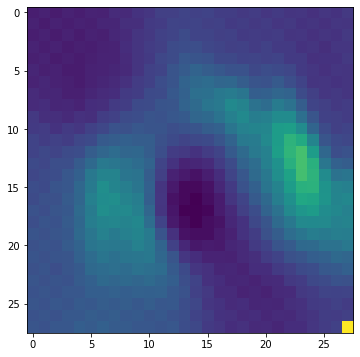

In [12]:
from vis.visualization import visualize_activation
from vis.utils import utils
from keras import activations
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (18, 6)

# Utility to search for layer index by name
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'preds')

# Swap softmax with linear
from keras import activations
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

# This is the output node we want to maximize
filter_idx = 0
img = visualize_activation(model, layer_idx, filter_indices=filter_idx)
plt.imshow(img[..., 0])

Iteration: 1, named_losses: [('ActivationMax Loss', -0.6205504),
 ('L-6.0 Norm Loss', 0.019824209),
 ('TV(2.0) Loss', 0.09243571)], overall loss: -0.5082904696464539
Iteration: 2, named_losses: [('ActivationMax Loss', -53.545166),
 ('L-6.0 Norm Loss', 0.17309304),
 ('TV(2.0) Loss', 462.17822)], overall loss: 408.80615234375
Iteration: 3, named_losses: [('ActivationMax Loss', -101.0599),
 ('L-6.0 Norm Loss', 0.17576367),
 ('TV(2.0) Loss', 129.57167)], overall loss: 28.687538146972656
Iteration: 4, named_losses: [('ActivationMax Loss', -127.70437),
 ('L-6.0 Norm Loss', 0.1860303),
 ('TV(2.0) Loss', 135.54877)], overall loss: 8.030426025390625
Iteration: 5, named_losses: [('ActivationMax Loss', -161.40456),
 ('L-6.0 Norm Loss', 0.20828903),
 ('TV(2.0) Loss', 102.71884)], overall loss: -58.47743225097656
Iteration: 6, named_losses: [('ActivationMax Loss', -189.05157),
 ('L-6.0 Norm Loss', 0.23735933),
 ('TV(2.0) Loss', 117.12045)], overall loss: -71.69375610351562
Iteration: 7, named_losse

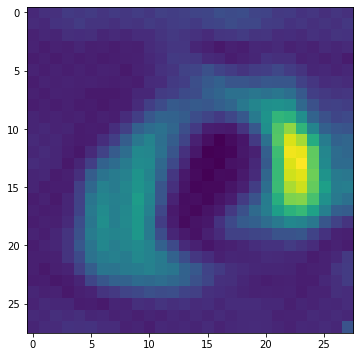

In [13]:
img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0., 1.), verbose=True)
plt.imshow(img[..., 0])

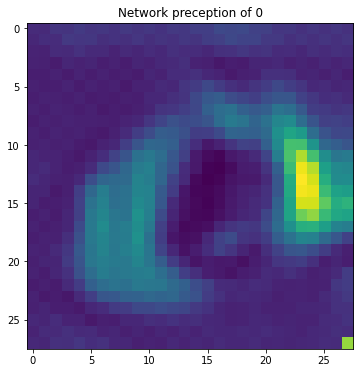

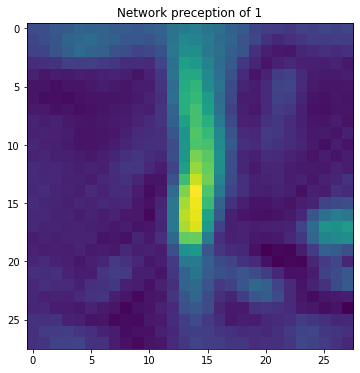

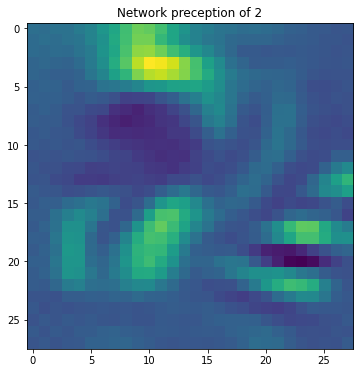

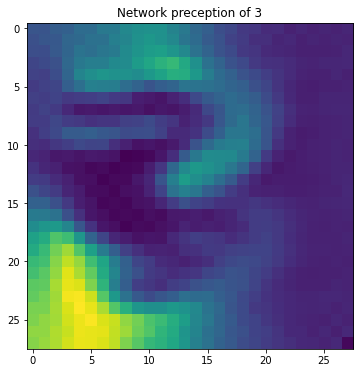

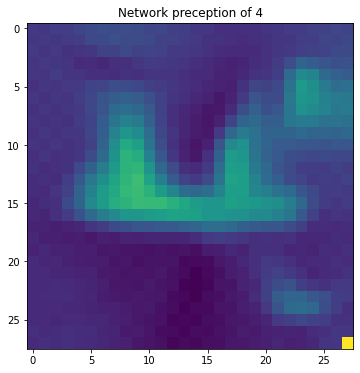

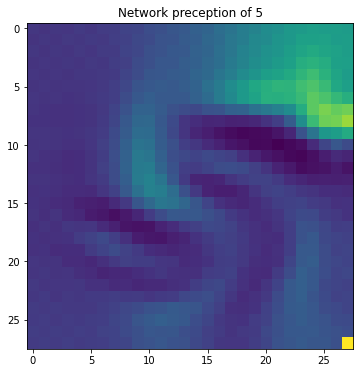

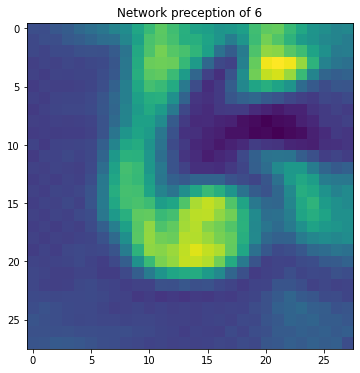

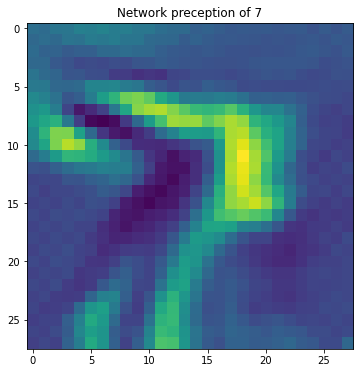

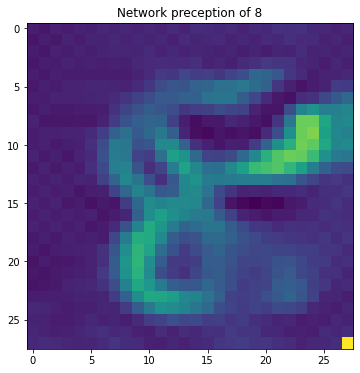

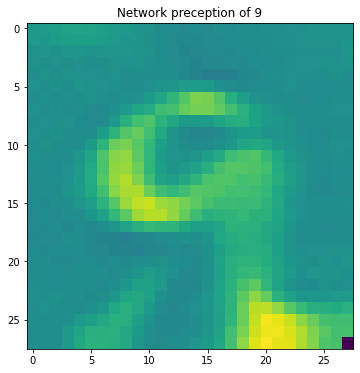

In [14]:
# Generating visualization for all classes (0-9)
for output_idx in np.arange(10):
  img = visualize_activation(model, layer_idx, filter_indices=output_idx, input_range=(0., 1.))
  plt.figure()
  plt.title('Network preception of {}'. format(output_idx))
  plt.imshow(img[..., 0])

# **Saliency_Map_&_Class_Activation_Maps_Keras_Visualization**

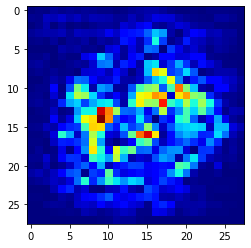

In [15]:
from vis.visualization import visualize_saliency
from vis.utils import utils
from keras import activations
from matplotlib import pyplot as plt
%matplotlib inline

class_idx = 0
indices = np.where(y_test[:, class_idx] == 1.)[0]

# pick some random input from here.
idx = indices[0]

# Utility to search for layer index by name,
# Alternatively we can specify this as -1 ince it corresponds to the last layer
layer_idx = utils.find_layer_idx(model, 'preds')

# Swaps softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, seed_input=x_test[idx])
# Plot with 'jet' colormap to visualize as a heatmap
plt.imshow(grads, cmap='jet')

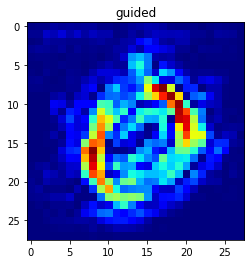

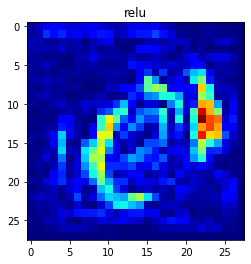

In [16]:
for modifier in ['guided', 'relu']:
  grads = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                             seed_input=x_test[idx], backprop_modifier=modifier)
  plt.figure()
  plt.title(modifier)
  plt.imshow(grads, cmap='jet')

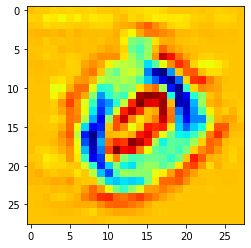

In [17]:
grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, seed_input=x_test[idx],
                           backprop_modifier='guided', grad_modifier='negate')
plt.imshow(grads, cmap='jet')

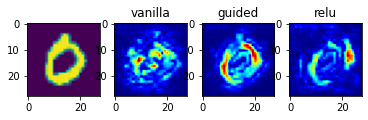

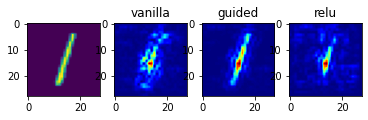

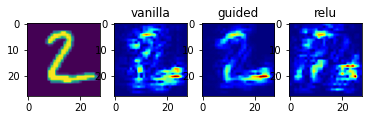

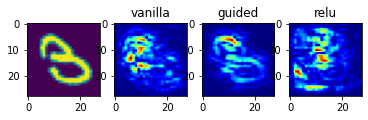

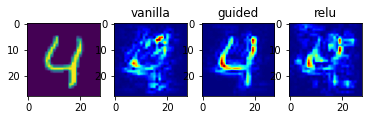

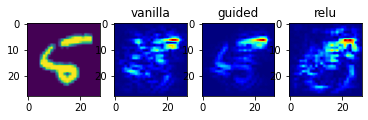

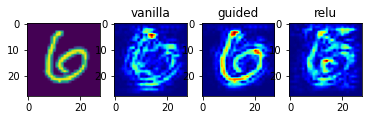

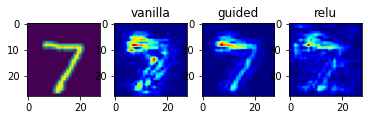

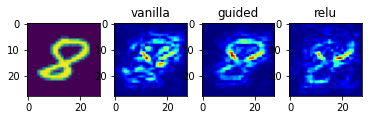

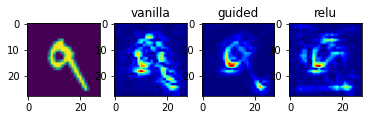

In [18]:
# This corresponds to the dese linear layer.
for class_idx in np.arange(10):
  indices = np.where(y_test[:, class_idx] == 1.)[0]
  idx = indices[0]

  f, ax = plt.subplots(1, 4)
  ax[0].imshow(x_test[idx][..., 0])

  for i, modifier in enumerate([None, 'guided', 'relu']):
      grads = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                             seed_input=x_test[idx], backprop_modifier=modifier)
      if modifier is None:
          modifier = 'vanilla'
      ax[i+1].set_title(modifier)
      ax[i+1].imshow(grads, cmap='jet')

**grad-CAM - vanilla, guided, rectified**

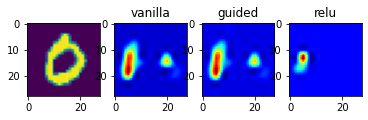

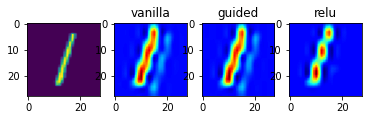

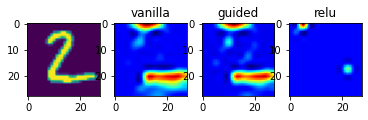

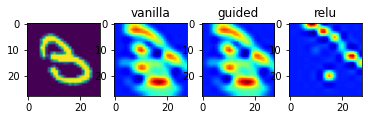

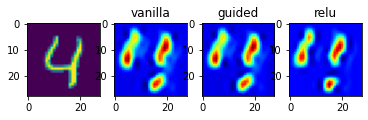

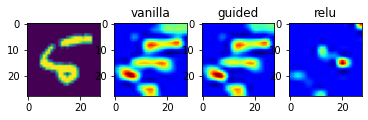

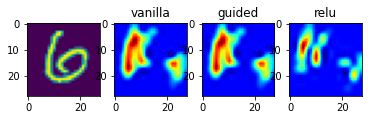

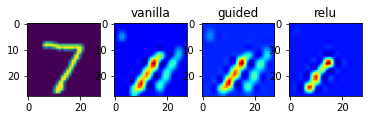

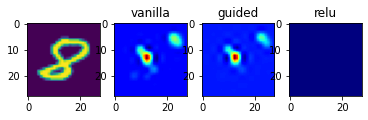

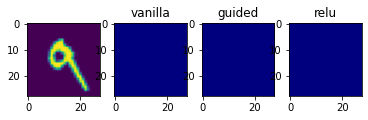

In [20]:
from vis.visualization import visualize_cam
# This corresponds to the dense linear layers.

for class_idx in np.arange(10):
    indices = np.where(y_test[:, class_idx] == 1.)[0]
    idx = indices[0]

    f, ax = plt.subplots(1, 4)
    ax[0].imshow(x_test[idx][..., 0])

    for i, modifier in enumerate([None, 'guided', 'relu']):
        grads = visualize_cam(model, layer_idx, filter_indices=class_idx,
                              seed_input=x_test[idx], backprop_modifier=modifier)
        if modifier is None:
            modifier = 'vanilla'
        ax[i+1].set_title(modifier)
        ax[i+1].imshow(grads, cmap='jet')

**Visualization without swapping softmax**

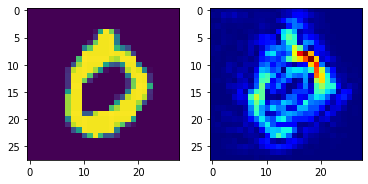

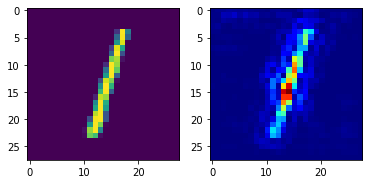

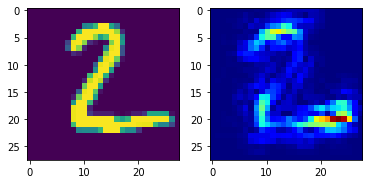

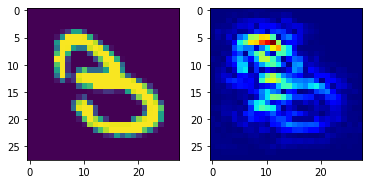

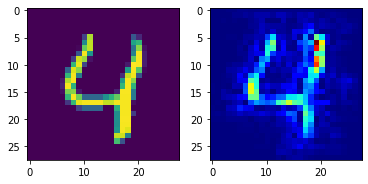

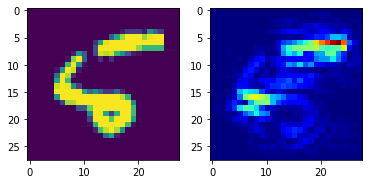

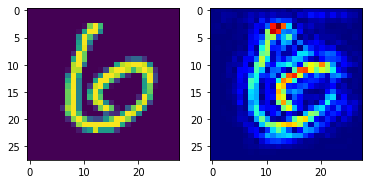

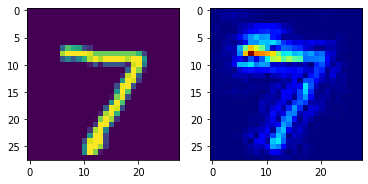

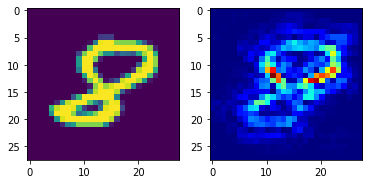

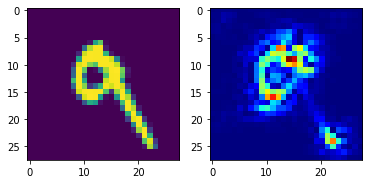

In [21]:
# Swap linear back with softmax
model.layers[layer_idx].activation = activations.softmax
model = utils.apply_modifications(model)

for class_idx in np.arange(10):
    indices = np.where(y_test[:, class_idx] == 1.)[0]
    idx = indices[0]

    grads = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                               seed_input=x_test[idx], backprop_modifier='guided')
    
    f, ax = plt.subplots(1, 2)
    ax[0].imshow(x_test[idx][..., 0])
    ax[1].imshow(grads, cmap='jet')